In [4]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
import calendar
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame
import matplotlib.dates as mdates
from sklearn.cluster import DBSCAN
from sklearn import metrics
from shapely.geometry import MultiPoint


In [130]:
# Setup Fonts for any processing
title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Arial', style='normal', size=12, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Arial', style='normal', size=11, weight='normal', stretch='normal')

In [157]:
# Read in input data and setup as a dataframe
# Grab Date and split date into year, month, day for processing. 
# The data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('school.csv', encoding='utf-8')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'], df['month'], df['day'] = df['date'].dt.year, df['date'].dt.month , df['date'].dt.day
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['country_name'] = df['country'].str.split(',',n=0).str[2].fillna(df['country'])
df['country_name'] = df['country_name'].str.strip()


In [4]:
# Lets find the total number of articles per sport in the last year. 
# The description for this is not right.. I know.. Got to figure out better way to describe. 
countdata = df.groupby(df['sport']).size()
countdata


sport
Baseball       76941
Basketball    122632
Cricket        54032
Football      234308
Golf          149374
Hockey         76937
Rugby          52687
Soccer        127104
Tennis         67514
Volleyball     43369
dtype: int64

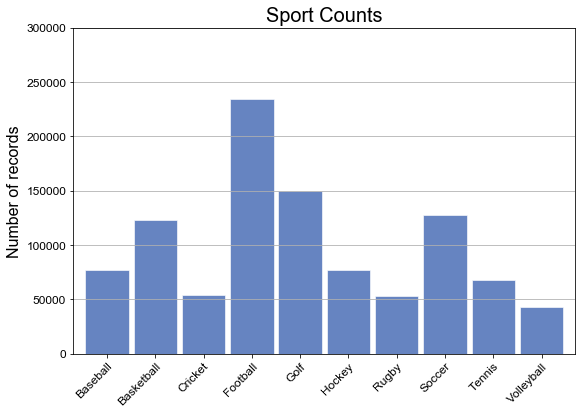

In [5]:
# Create a Graph showing the data of all the Sports 
xlabels = pd.Series(countdata.index)

ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 300000])

ax.set_xticks(range(len(countdata.data)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Sport Counts', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of records', fontproperties=label_font)

plt.show()

In [6]:
## Total count of articles per sport for entire year
sumdata = df.groupby('sport').sum()
sumdata2 = pd.DataFrame(sumdata, columns=['count'])
sumdata2

,count
sport,
Baseball,218943
Basketball,444089
Cricket,143215
Football,926165
Golf,384996
Hockey,187479
Rugby,111434
Soccer,433717
Tennis,160358


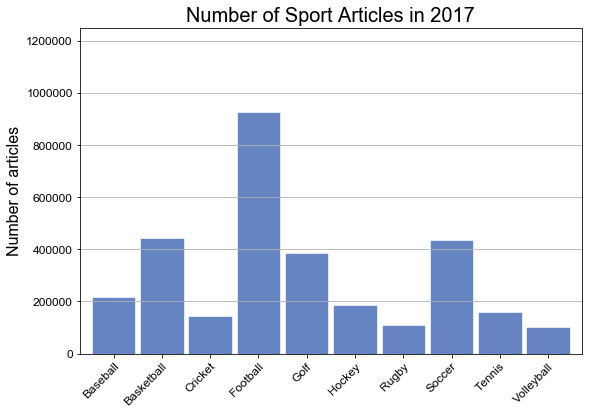

In [7]:
# Create a Graph showing the data of all the Sports 
xlabels = pd.Series(sumdata2.index)

ax = sumdata2.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    legend=False,
                    ylim=[0, 1250000])

ax.set_xticks(range(len(sumdata2)))
ax.set_xticklabels(sumdata2.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Number of Sport Articles in 2017', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of articles', fontproperties=label_font)

plt.show()

In [8]:
## Total count of articles per sport for per month for year
sumdata_2 = df.groupby(['sport','month']).sum()
sumdata_2_1 = pd.DataFrame(sumdata_2, columns=['count'])
sumdata_2_1.head(12)


count
sport    month       
Baseball 1      30716
         2      21875
         3      23972
         4      13447
         5      14752
         6      22765
         7      19633
         8      14646
         9      15546
         10     15965
         11     16617
         12      9009

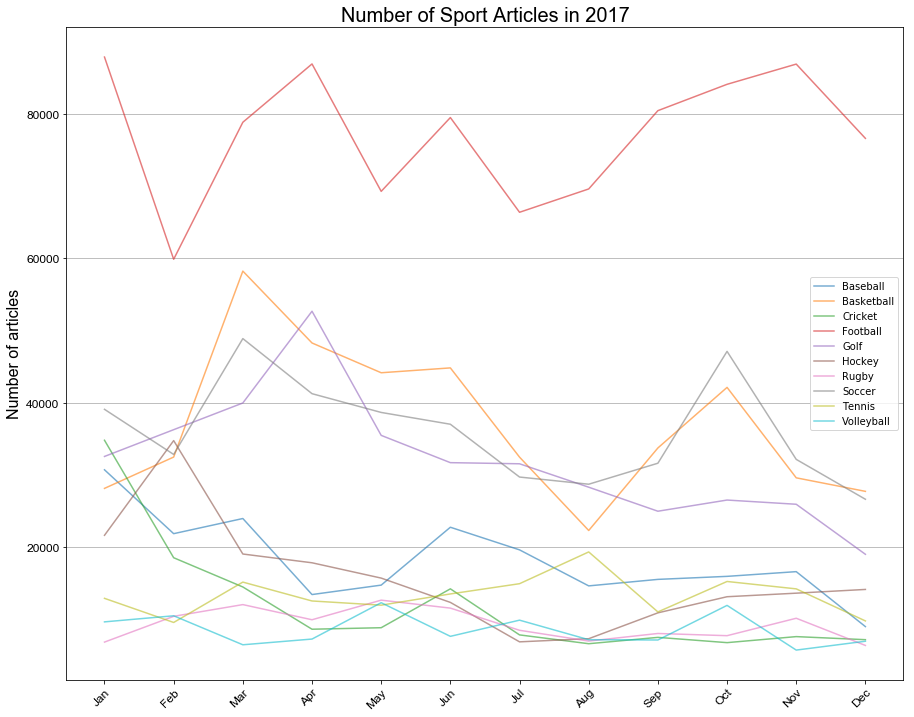

In [9]:
# Create a Graph showing the data of all the Sports 
data1 = sumdata_2_1.reset_index()
data1['month_name'] = data1['month'].apply(lambda x: calendar.month_abbr[x])
fig, ax = plt.subplots()

for key, grp in data1.groupby(['sport']):
    ax = grp.plot(ax=ax, 
                  kind='line', 
                  x='month_name', 
                  y='count', 
                  alpha=0.6, 
                  grid=False,
                  figsize=[15, 12],
                  label=key)
    
ax.set_xticks(range(max(data1.month)))
ax.set_xticklabels(data1.month_name, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Number of Sport Articles in 2017', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of articles', fontproperties=label_font)
    

plt.legend(loc='best')
plt.show()


In [132]:
## Total count of articles per sport for per country for year
sumdata_3 = pd.DataFrame(df.loc[df.sport == 'Football'])
sumdata_3_1 = sumdata_3.groupby(['month','day','date']).sum()
sumdata_3_1 = sumdata_3_1.reset_index()
sumdata_3_2 = pd.DataFrame(sumdata_3_1, columns=['count','month','day','date'])
sumdata_3_2['month_name'] = sumdata_3_2['month'].apply(lambda x: calendar.month_abbr[x])
sumdata_3_2.head(31)

,count,month,day,date,month_name
0,2838,1,1,2017-01-01,Jan
1,3666,1,2,2017-01-02,Jan
2,3703,1,3,2017-01-03,Jan
3,3378,1,4,2017-01-04,Jan
4,2791,1,5,2017-01-05,Jan
5,2035,1,6,2017-01-06,Jan
6,1317,1,7,2017-01-07,Jan
7,1581,1,8,2017-01-08,Jan
8,3895,1,9,2017-01-09,Jan
9,4848,1,10,2017-01-10,Jan


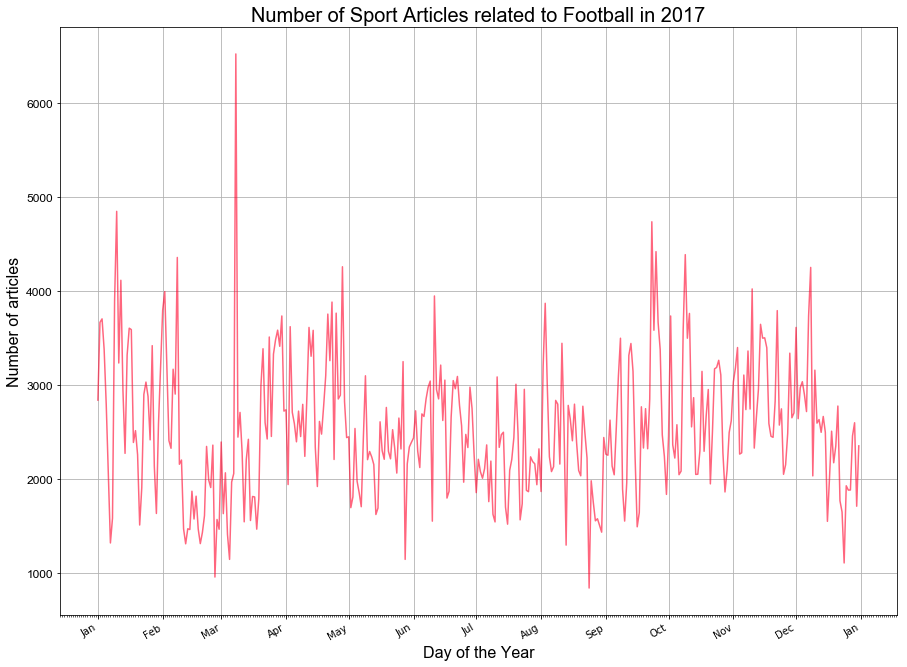

In [131]:
# Focus in on Football over the course of 2017 
fig, ax = plt.subplots()


ax = sumdata_3_2.plot(ax=ax, 
                  kind='line', 
                  x='date', 
                  y='count',
                  colormap='gist_rainbow',
                  alpha=0.6,
                  figsize=[15, 12],
                  legend=False,)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Number of Sport Articles related to Football in 2017', fontproperties=title_font)
ax.xaxis.grid(False, which="minor")
ax.xaxis.grid(True, which="major")
ax.set_xlabel('Day of the Year', fontproperties=label_font)
ax.set_ylabel('Number of articles', fontproperties=label_font)

plt.show()

In [ ]:
# There is a major spike in Football Articles beginning in the month of March. Lets focus our data 
# to those data points to see if we can determine a possible triggering event.

In [138]:
# Lets find the day that this happened on in March
football_march_day = pd.DataFrame(sumdata_3_2.loc[sumdata_3_2.month == 3])
football_march_day.sort_values(by=['count'], ascending=False).head(5)



,count,month,day,date,month_name
66,6524,3,8,2017-03-08,Mar
88,3734,3,30,2017-03-30,Mar
86,3583,3,28,2017-03-28,Mar
82,3510,3,24,2017-03-24,Mar
85,3480,3,27,2017-03-27,Mar


In [160]:
# Largest Value was on March 8th, 2017. Lets pull that data from the original dataset
football_march_month = pd.DataFrame(df.loc[df.month_name == 'Mar'])
football_march_day = pd.DataFrame(football_march_month.loc[football_march_month.day == 8])
fmd_gb = football_march_day.groupby(['country_name']).sum()
football_march = fmd_gb.reset_index()
football_march.sort_values(by=['count'], ascending=False)

,country_name,lat,long,count,year,month,day
222,United States,24056.98000,-60700.964900,2061,1294914,1926,5136
216,Turkey,6394.31240,5630.740200,1011,330788,492,1312
72,Germany,4734.56800,936.898840,786,187581,279,744
14,Australia,-5973.57010,26496.997000,560,369111,549,1464
103,Japan,1469.99020,5721.728000,482,84714,126,336
202,Sweden,1853.18330,501.666700,458,60510,90,240
199,Spain,1665.99240,-143.489932,457,84714,126,336
183,Russia,2427.23680,2869.351600,425,88748,132,352
176,Portugal,1419.33380,-317.310150,370,72612,108,288
101,Italy,4169.73960,1108.872840,340,195649,291,776


In [6]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088
# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [41]:

# Remove NaN  
data = pd.DataFrame(df.loc[df.sport == 'Football'])

sumdata = pd.DataFrame(data.loc[data.month_name == 'Jun'])
df_gps = sumdata.dropna(axis=0, how='any')
df_gps


,date,sport,country,lat,long,count,year,month,day,month_name
442356,2017-06-01,Football,Afghanistan,33.0000,65.000000,16,2017,6,1,Jun
442357,2017-06-01,Football,Albania,41.0000,20.000000,12,2017,6,1,Jun
442358,2017-06-01,Football,Angola,-12.5000,18.500000,1,2017,6,1,Jun
442359,2017-06-01,Football,Argentina,-34.0000,-64.000000,31,2017,6,1,Jun
442360,2017-06-01,Football,Armenia,40.0000,45.000000,3,2017,6,1,Jun
442361,2017-06-01,Football,Australia,-27.0000,133.000000,24,2017,6,1,Jun
442362,2017-06-01,Football,Austria,47.3333,13.333300,9,2017,6,1,Jun
442363,2017-06-01,Football,Azerbaijan,40.5000,47.500000,10,2017,6,1,Jun
442364,2017-06-01,Football,Bahrain,26.0000,50.550000,1,2017,6,1,Jun
442365,2017-06-01,Football,Bangladesh,24.0000,90.000000,1,2017,6,1,Jun


In [ ]:
## Total count of articles per country for entire year
sumdata = df.groupby('country').sum()
sumdata2 = pd.DataFrame(sumdata, columns=['count'])
sumdata2

In [126]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

In [92]:
def dbscan_reduce(df, epsilon, x='long', y='lat'):
    start_time = time.time()
    # represent points consistently as (lat, lon) and convert to radians to fit using haversine metric
    coords = df.as_matrix(columns=[y, x])    
    db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    print('Number of clusters: {:,}'.format(num_clusters))
    
    clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])
    
    # find the point in each cluster that is closest to its centroid
    centermost_points = clusters.map(get_centermost_point)

    # unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
    lats, lons = zip(*centermost_points)
    rep_points = pd.DataFrame({x:lons, y:lats})
    rep_points.tail()
    
    # pull row from original data set where lat/lon match the lat/lon of each row of representative points
    rs = rep_points.apply(lambda row: df[(df[y]==row[y]) & (df[x]==row[x])].iloc[0], axis=1)
    
    # all done, print outcome
    message = 'Clustered {:,} points down to {:,} points, for {:.2f}% compression in {:,.2f} seconds.'
    print(message.format(len(df), len(rs), 100*(1 - float(len(rs)) / len(df)), time.time()-start_time)) 
    
    coefficient = metrics.silhouette_score(coords, cluster_labels)
    print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))
    
    return rs

In [96]:
# first cluster the full gps location history data set coarsely, with epsilon=5km in radians
eps_rad = 75 / kms_per_radian
df_clustered = dbscan_reduce(df_gps, epsilon=eps_rad)

Number of clusters: 1,369
Clustered 19,653 points down to 1,369 points, for 93.03% compression in 2.29 seconds.
Silhouette coefficient: 0.162


In [82]:
# next, sample every nth row (where n=sample_rate) of the full gps location history data set
sample_rate = 20
df_sampled = df_gps.iloc[range(0, len(df_gps), sample_rate)]
len(df_sampled)

983

In [83]:
# combine the clustered and sampled sets
df_combined = pd.concat([df_clustered, df_sampled], axis=0)
df_combined = df_combined.reset_index().drop(labels='index', axis=1)

In [94]:
# then reduce by clustering again, finely this time with epsilon=0.1km in radians
eps_rad = 25 / kms_per_radian
df_final = dbscan_reduce(df_combined, epsilon=eps_rad)

Number of clusters: 905
Clustered 1,285 points down to 905 points, for 29.57% compression in 0.92 seconds.
Silhouette coefficient: 0.433


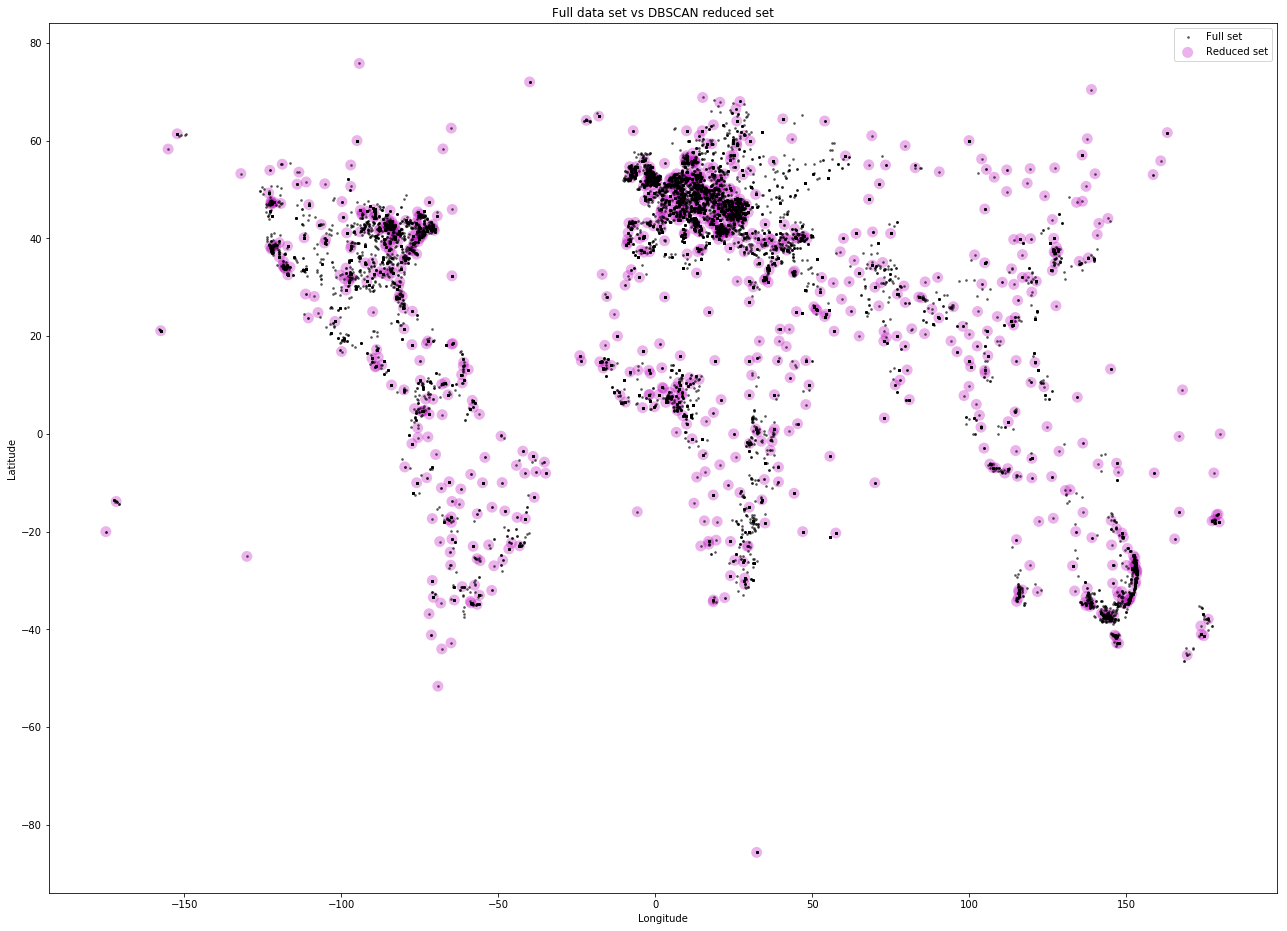

In [87]:
# show a map of the worldwide data points
fig, ax = plt.subplots(figsize=[22, 16])
rs_scatter = ax.scatter(df_final['long'], df_final['lat'], c='m', edgecolor='None', alpha=0.3, s=120)
df_scatter = ax.scatter(df_gps['long'], df_gps['lat'], c='k', alpha=0.5, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [88]:
df_clustered

,date,sport,country,lat,long,count,year,month,day,month_name
0,2017-06-20,Football,"Sharifabad, Punjab, Pakistan",30.93550,71.91690,1,2017,6,20,Jun
1,2017-06-19,Football,"Zalaegerszeg, Zala, Hungary",46.84000,16.84390,1,2017,6,19,Jun
2,2017-06-01,Football,Angola,-12.50000,18.50000,1,2017,6,1,Jun
3,2017-06-01,Football,Argentina,-34.00000,-64.00000,31,2017,6,1,Jun
4,2017-06-01,Football,Australia,-27.00000,133.00000,24,2017,6,1,Jun
5,2017-06-01,Football,Qatar,25.50000,51.25000,7,2017,6,1,Jun
6,2017-06-13,Football,"Durgapur, West Bengal, India",25.53330,88.13330,1,2017,6,13,Jun
7,2017-06-01,Football,"Motagua, Departamento De Cortes, Honduras",15.70000,-88.23330,1,2017,6,1,Jun
8,2017-06-01,Football,Bermuda,32.33330,-64.75000,2,2017,6,1,Jun
9,2017-06-20,Football,"Omereque, Cochabamba, Bolivia",-18.10670,-64.90720,1,2017,6,20,Jun


In [ ]:
# get colors and plot all the points, color-coded by cluster (or gray if not in any cluster, aka noise)
fig, ax = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for each cluster label and color, plot the cluster's points
for cluster_label, color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1: #make the noise (which is labeled -1) appear as smaller gray points
        color = 'gray'
        size = 30
    
    # plot the points that match the current cluster label
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()

In [110]:
# first cluster the full gps location history data set coarsely, with epsilon=5km in radians
eps_rad = 100 / kms_per_radian
#df_clustered = dbscan_reduce(df_gps, epsilon=eps_rad)

In [127]:
### This is the new way of running these queries 
epsilon = eps_rad
x='long'
y='lat'
start_time = time.time()
# represent points consistently as (lat, lon) and convert to radians to fit using haversine metric
coords = df_gps.as_matrix(columns=[y, x])
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
print('Number of clusters: {:,}'.format(num_clusters))

clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

# find the point in each cluster that is closest to its centroid
centermost_points = clusters.map(get_centermost_point)

# unzip the list of centermost points (lat, long) tuples into separate lat and long lists
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({x:lons, y:lats})
rep_points.tail()

# pull row from original data set where lat/lon match the lat/lon of each row of representative points
rs = rep_points.apply(lambda row: df_gps[(df_gps[y]==row[y]) & (df_gps[x]==row[x])].iloc[0], axis=1)

# all done, print outcome
message = 'Clustered {:,} points down to {:,} points, for {:.2f}% compression in {:,.2f} seconds.'
print(message.format(len(df_gps), len(rs), 100*(1 - float(len(rs)) / len(df_gps)), time.time()-start_time)) 



Number of clusters: 272


IndexError: list index out of range

In [112]:
coefficient = metrics.silhouette_score(coords, cluster_labels)
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Silhouette coefficient: 0.018


In [113]:
# number of clusters, ignoring noise if present
num_clusters = len(set(cluster_labels)) #- (1 if -1 in labels else 0)
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 1013


In [114]:
# create a series to contain the clusters - each element in the series is the points that compose each cluster
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
clusters.tail()


1008    [[63.5569, 44.3107]]
1009       [[53.25, -132.0]]
1010     [[-14.1833, 12.35]]
1011    [[48.0466, 36.7518]]
1012       [[58.3, 30.2333]]
dtype: object

In [115]:
# given a cluster of points, return the point nearest to the cluster's centroid# given  
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

In [116]:

# find the point in each cluster that is closest to its centroid# find t 
centermost_points = clusters.map(get_centermost_point)

# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
representative_points = pd.DataFrame({'lon':lons, 'lat':lats})
representative_points.tail()
representative_points.tail()

,lat,lon
1008,63.5569,44.3107
1009,53.2500,-132.0000
1010,-14.1833,12.3500
1011,48.0466,36.7518
1012,58.3000,30.2333


In [118]:
# pull row from full data set (df) where lat/lon match the lat/lon of each row of representative points
# use iloc[0] to pull just the first row if there are multiple matches
rs = representative_points.apply(lambda row: df_gps[(df_gps['lat']==row['lat']) & (df_gps['long']==row['lon'])].iloc[0], axis=1)
rs.to_csv('reduced-set.csv', index=False)
rs.tail()

,date,sport,country,lat,long,count,year,month,day,month_name
1008,2017-06-30,Football,"Krova, Arkhangel'skaya Oblast', Russia",63.5569,44.3107,1,2017,6,30,Jun
1009,2017-06-30,Football,"Skidegate, British Columbia, Canada",53.2500,-132.0000,1,2017,6,30,Jun
1010,2017-06-30,Football,"Tiger Bay, Namibe, Angola",-14.1833,12.3500,1,2017,6,30,Jun
1011,2017-06-30,Football,"Yalta, Donets'ka Oblast', Ukraine",48.0466,36.7518,1,2017,6,30,Jun
1012,2017-06-30,Football,"Zoli, Novgorodskaya Oblast', Russia",58.3000,30.2333,1,2017,6,30,Jun


In [120]:
# to demonstrate the data reduction, compare how many observations of 'Spain' in each data set
print(len(df_gps[df_gps['country']=='Spain']))
print(len(rs[rs['country']=='Spain']))

30
0


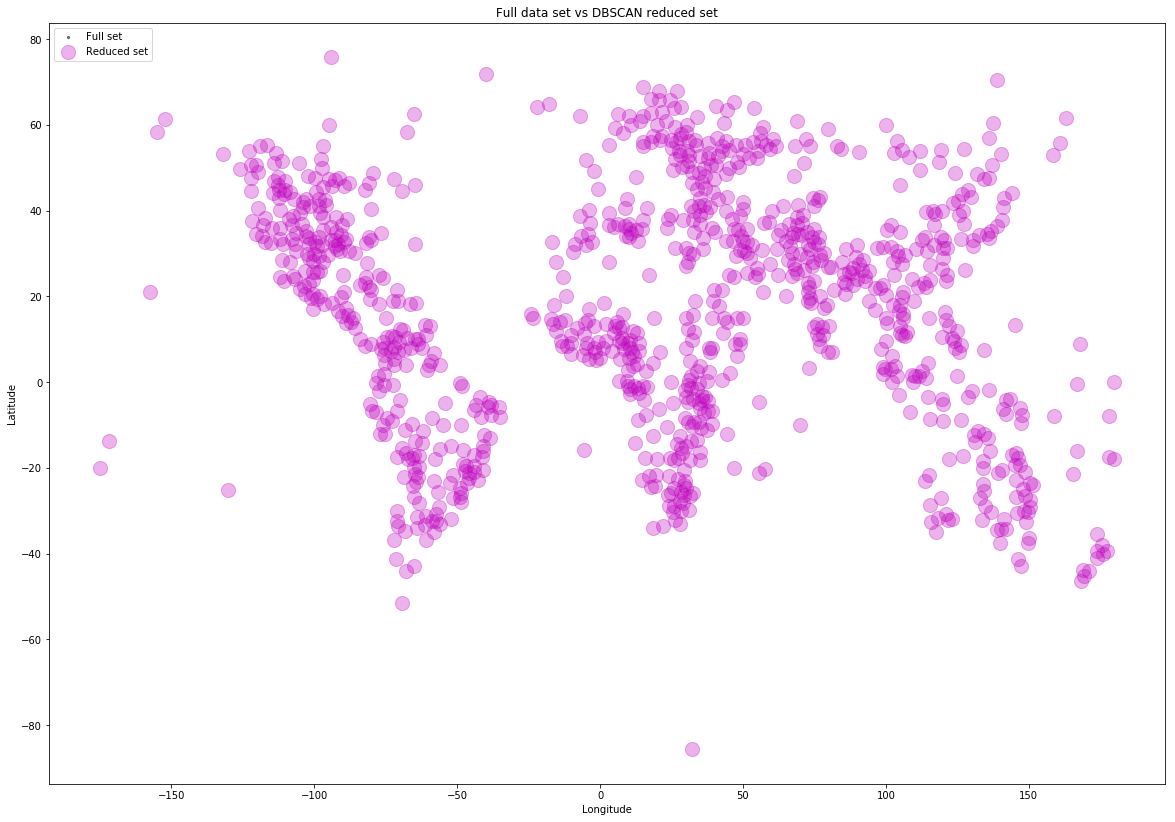

In [124]:
# plot the final reduced set of coordinate points vs the original full set# plot t 
fig, ax = plt.subplots(figsize=[20,14])
rs_scatter = ax.scatter(rs['long'], rs['lat'], c='m', alpha=0.3, s=200)
#df_scatter = ax.scatter(df['long'], df['lat'], c='k', alpha=0.5, s=5)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper left')
plt.show()